# Laboratory practice № 8 (Modals controlles and observers)

Done by Dmitriy Novichkov

Variat №19

## Preparation

In [383]:
import scipy
import sympy
import numpy as np

import control as ctrl

import matplotlib.pyplot as plt


dt = 1e-3
t = sympy.symbols("t",real=True)

## Task 1

In [384]:
A = np.array([
    [4, 6, 4],
    [-4, -6, -6],
    [4, 4, 4],
])

B = np.array([
    [4],
    [-1],
    [1]
])

sigma_1 = [-1]*3
sigma_2 = [-2]*3
sigma_3 = [-1, -10, -100]
sigma_4 = [-2, -20, -200]
sigma_5 = [-1, -1+3j, -1-3j]
sigma_6 = [-2, -2+6j, -2-6j]


# A = np.array([
#     [12, -1, 14],
#     [6, 0, 6],
#     [-6, -2, -8],
# ])

# B = np.array([
#     [11],
#     [-7],
#     [7]
# ])

# sigma_1 = [-1]*3
# sigma_2 = [-2]*3
# sigma_3 = [-1, -10, -100]
# sigma_4 = [-2, -20, -200]
# sigma_5 = [-1, -1+3j, -1-3j]
# sigma_6 = [-2, -2+6j, -2-6j]


In [385]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigenvalues of matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue:.4f}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue:.4f}:")
    print(r"\begin{bmatrix}")
    for row in H:
        print(" & ".join([f"{x:.4f}" for x in row]) + r" \\")
    print(r"\end{bmatrix}")
    
    print(f"Rank of Hautus matrix: {rank}")
    
    if rank == 3:
        print(f"System is controllable for λ_{i+1} = {eigenvalue:.4f}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue:.4f}.")

Eigenvalues of matrix A:
λ_1 = 2.0000+2.0000j
λ_2 = 2.0000-2.0000j
λ_3 = -2.0000+0.0000j

Matrix Hautus for λ_1 = 2.0000+2.0000j:
\begin{bmatrix}
2.0000-2.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -8.0000-2.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\
4.0000+0.0000j & 4.0000+0.0000j & 2.0000-2.0000j & 1.0000+0.0000j \\
\end{bmatrix}
Rank of Hautus matrix: 3
System is controllable for λ_1 = 2.0000+2.0000j.

Matrix Hautus for λ_2 = 2.0000-2.0000j:
\begin{bmatrix}
2.0000+2.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -8.0000+2.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\
4.0000+0.0000j & 4.0000+0.0000j & 2.0000+2.0000j & 1.0000+0.0000j \\
\end{bmatrix}
Rank of Hautus matrix: 3
System is controllable for λ_2 = 2.0000-2.0000j.

Matrix Hautus for λ_3 = -2.0000+0.0000j:
\begin{bmatrix}
6.0000+0.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -4.0000+0.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\

**-2 is not controllable, but stable**

In [386]:
sigma_2

[-2, -2, -2]

In [417]:
G_1 = np.array([
    [-2, 1, 0],
    [0, -2, 1],
    [0, 0, -2]
])
Y_1 = np.array([1,0,1]).reshape((1,-1))
# B@Y_1

In [418]:
P_1 = scipy.linalg.solve_sylvester(A,-G_1,B@Y_1)
P_1

array([[ 3.21792707e-01, -6.74224401e+13, -2.55084141e+28],
       [ 6.78207293e-01,  6.74224401e+13,  2.55084141e+28],
       [-5.00000000e-01, -2.40307181e-01,  8.84348240e+12]])

In [419]:
K_1 = -Y_1 @ np.linalg.inv(P_1)
K_1

array([[-1.93524902, -1.93524902, -1.93524902]])

In [420]:
scipy.linalg.eigvals(A + B@K_1)

array([-1.87049804+0.79419081j, -1.87049804-0.79419081j,
       -2.        +0.j        ])

In [421]:
sys_1 = ctrl.ss(A + B@K_1,np.zeros((3,1)),np.zeros((1,3)),0)
sys_1

<LinearIOSystem:sys[24]:['u[0]']->['y[0]']>

In [422]:
time_1 = np.linspace(0,10,int(10/dt))

In [423]:
y_1 = ctrl.initial_response(sys_1,time_1,X0=np.ones((3,1)))

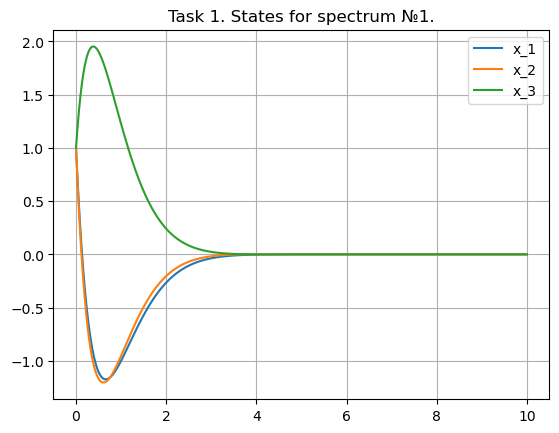

In [424]:
plt.plot(time_1,y_1.states[0,:],label="x_1")
plt.plot(time_1,y_1.states[1,:],label="x_2")
plt.plot(time_1,y_1.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №1.")
plt.grid()
plt.legend()

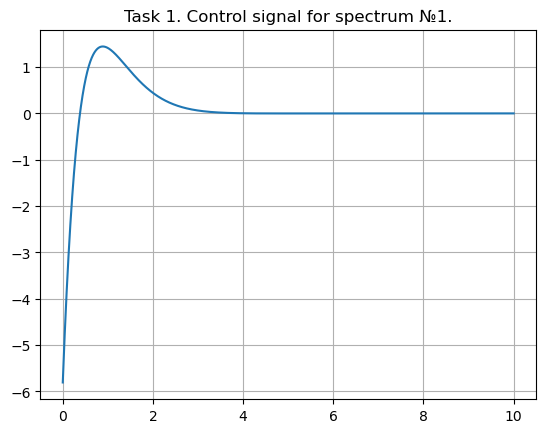

In [425]:
plt.plot(time_1,(K_1@y_1.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №1.")
plt.grid()

In [426]:
sigma_4

[-2, -20, -200]

In [427]:
G_2 = np.array([
    [-2, 0, 0],
    [0, -20, 0],
    [0, 0, -200,],
])
Y_2 = np.array([0,1,1]).reshape((1,-1))
P_2 = scipy.linalg.solve_sylvester(A,-G_2,B@Y_2)
K_2 = -Y_2 @ np.linalg.pinv(P_2)
K_2

array([[  26.08,  164.16, -164.16]])

In [428]:
scipy.linalg.eigvals(A + B@K_2)

array([-200.+0.j,  -20.+0.j,   -2.+0.j])

In [436]:
sys_2 = ctrl.ss(A + B@K_2,np.zeros((3,1)),np.zeros((1,3)),0)
time_2 = np.linspace(0,10,int(1/dt))
y_2 = ctrl.initial_response(sys_2,time_2,X0=np.ones((3,1)))

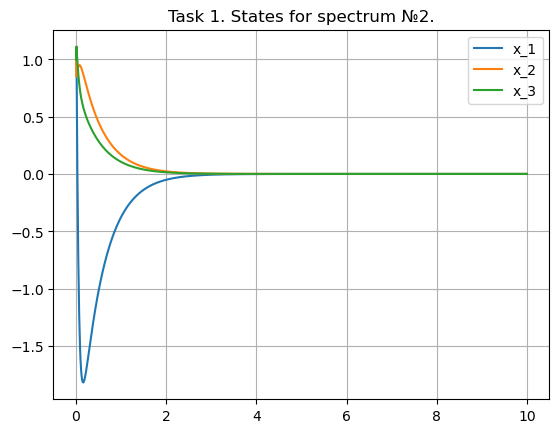

In [437]:
plt.plot(time_2,y_2.states[0,:],label="x_1")
plt.plot(time_2,y_2.states[1,:],label="x_2")
plt.plot(time_2,y_2.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №2.")
plt.grid()
plt.legend()

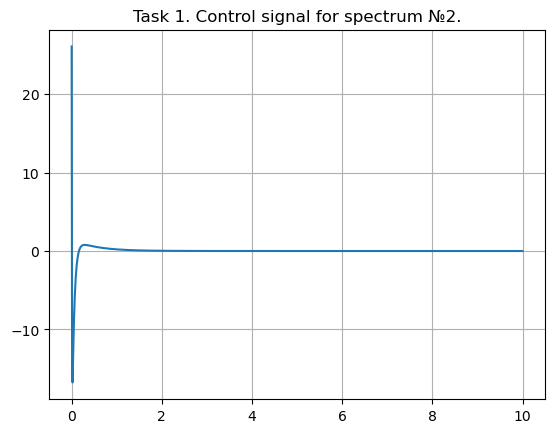

In [438]:
plt.plot(time_2,(K_2@y_2.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №2.")
plt.grid()

In [439]:
sigma_6

[-2, (-2+6j), (-2-6j)]

In [440]:
G_3 = np.array([
    [-2, 0, 0],
    [0, -2, 6],
    [0, -6, -2]
])
Y_3 = np.array([0,1,1]).reshape((1,-1))
P_3 = scipy.linalg.solve_sylvester(A,-G_3,B@Y_3)
K_3 = -Y_3 @ np.linalg.pinv(P_3)
K_3

array([[-1.28,  1.44, -1.44]])

In [441]:
scipy.linalg.eigvals(A + B@K_3)

array([-2.+6.j, -2.-6.j, -2.+0.j])

In [443]:
sys_3 = ctrl.ss(A + B@K_3,np.zeros((3,1)),np.zeros((1,3)),0)
time_3 = np.linspace(0,10,int(10/dt))
y_3 = ctrl.initial_response(sys_3,time_3,X0=np.ones((3,1)))

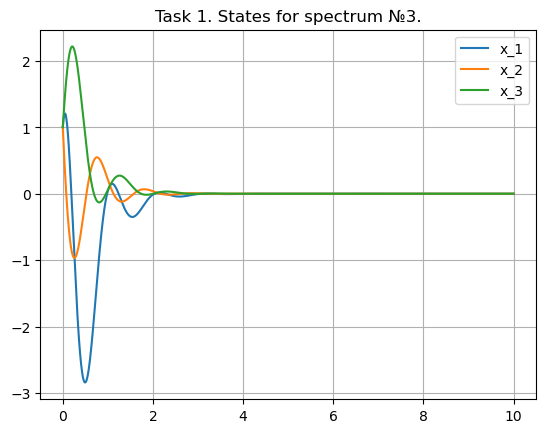

In [444]:
plt.plot(time_3,y_3.states[0,:],label="x_1")
plt.plot(time_3,y_3.states[1,:],label="x_2")
plt.plot(time_3,y_3.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №3.")
plt.grid()
plt.legend()

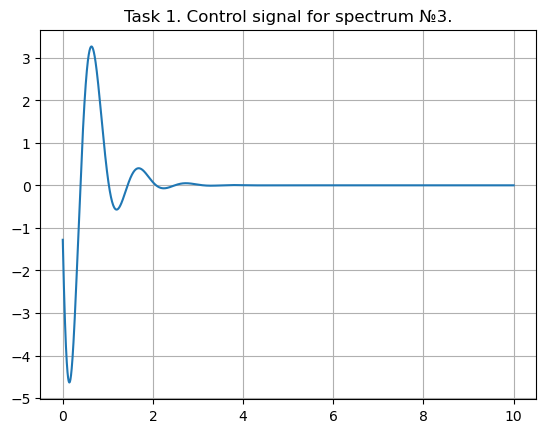

In [445]:
plt.plot(time_3,(K_3@y_3.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №3.")
plt.grid()